TO INSTALL, python setup.py --install in scheil base folder


This section works. 
# IGNORE UNTIL command lines

import pycalphad
import matplotlib.pyplot as plt
from pycalphad import Database, variables as v
from scheil import simulate_scheil_solidification
print(pycalphad.__version__)#0.10.1

# setup the simulation parameters
dbf = Database('C-Cr-Cu-Fe-Mo-Nb-Ni-02-20.tdb')
comps = ['CU','NI','VA']
phases = sorted(dbf.phases.keys()) #0.10.1
print(phases)
liquid_phase_name = 'LIQUID'
initial_composition = {v.X('CU'): 0.2}
start_temperature = 2000

# perform the simulation
sol_res = simulate_scheil_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=1.0)


# plot the result
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    if amounts[-1] > 0:
        plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.legend(loc='best')
plt.show()

This section doesn't work and does not involve the previous given memory fix for mu phase

import pycalphad
import matplotlib.pyplot as plt
from pycalphad import Database, variables as v
from scheil import simulate_scheil_solidification
print(pycalphad.__version__)

# setup the simulation parameters
dbf = Database('C-Cr-Cu-Fe-Mo-Nb-Ni-02-20.tdb')
comps = ['Fe', 'CU','CR','NI','MO','VA']
phases = sorted(dbf.phases.keys()) #0.10.1
liquid_phase_name = 'LIQUID'
initial_composition = {v.X('CU'): 0.2,v.X('CR'): 0.4,v.X('MO'): 0.01,v.X('FE'): 0.2}
start_temperature = 2000
print(phases)

# perform the simulation
sol_res = simulate_scheil_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=1.0,verbose=True,)


# plot the result
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    if amounts[-1] > 0:
        plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.legend(loc='best')
plt.show()

import matplotlib.pyplot as plt
from pycalphad import Database, binplot, equilibrium, Model
import pycalphad.variables as v
from symengine import Piecewise
from pycalphad.core.utils import instantiate_models, filter_phases, unpack_components

def unwrap_piecewise(graph):
    replace_dict = {}
    for atom in graph.atoms(Piecewise):
        args = atom.args
        # Unwrap temperature-dependent piecewise with zero-defaults
        if len(args) == 4 and args[2] == 0 and args[3] == True and atom.args[1].free_symbols == {v.T}:
            replace_dict[atom] = args[0]
        elif len(args) == 4 and args[0] == 0 and args[2] == 0:
            replace_dict[atom] = 0
    return graph.xreplace(replace_dict)

class CustomModel(Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        for name, value in self.models.items():
            for _ in range(5):
                self.models[name] = unwrap_piecewise(self.models[name])

db=Database('C-Cr-Cu-Fe-Mo-Nb-Ni-10-05.tdb')
comps2 = unpack_components(db, ['FE','NI','VA'])
phases = db.phases.keys()
phases = list(db.phases.keys())

fig2 = plt.figure(figsize=(9,6))
axes2 = fig2.gca()

models = instantiate_models(db, comps2, filter_phases(db, comps2, phases), model=CustomModel)

binplot(db, ['FE','NI','VA'] , phases, {v.X('NI'):(0,1,0.1), v.T: (300, 2000, 20), v.P:101325, v.N: 1},
        plot_kwargs={'ax': axes2}, eq_kwargs={'model': models})

plt.show()

In [9]:
#WORKING SCHEIL FIX

In [1]:
import scheil #this is importing scheil from github repository you download!

In [2]:
scheil #should print DRIVELETTER:\\Users\\'USER'\\'DOWNLOADLOCATION'\\scheil\\scheil\\__init__.py'
#or install location in general

<module 'scheil' from 'C:\\Users\\xander\\Desktop\\Cu_FGM\\Zhening_Pycalphad_Issue\\scheil\\scheil\\__init__.py'>

In [3]:
#Need pycalphad, version likely not important but I use 0.10.2
import pycalphad
import matplotlib.pyplot as plt
from pycalphad import Database, Model, binplot, variables as v
from scheil import simulate_scheil_solidification
from pycalphad.core.utils import instantiate_models, filter_phases, unpack_components
from symengine import Piecewise
print(pycalphad.__version__)

0.10.2


#### This is part of the fix already implemented, you can ignore but this gives information on what was changed
def unwrap_piecewise(graph):
    replace_dict = {}
    for atom in graph.atoms(Piecewise):
        args = atom.args
        # Unwrap temperature-dependent piecewise with zero-defaults
        if len(args) == 4 and args[2] == 0 and args[3] == True and atom.args[1].free_symbols == {v.T}:
            replace_dict[atom] = args[0]
        elif len(args) == 4 and args[0] == 0 and args[2] == 0:
            replace_dict[atom] = 0
    return graph.xreplace(replace_dict)

class CustomModel(Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        for name, value in self.models.items():
            for _ in range(5):
                self.models[name] = unwrap_piecewise(self.models[name])              



In [4]:
# setup the simulation parameters for a complex run
dbf = Database('C-Cr-Cu-Fe-Mo-Nb-Ni-02-20.tdb')
comps = ['FE','CU','CR','NI','MO','VA']
phases = sorted(dbf.phases.keys()) #0.10.1
liquid_phase_name = 'LIQUID'
initial_composition = {v.X('CU'): 0.2,v.X('CR'): 0.4,v.X('MO'): 0.01,v.X('FE'): 0.2}
start_temperature = 2000
print(phases)

['BCC_A2', 'CEMENTITE_D011', 'CR3C2', 'DELTA', 'DIAMOND_A4', 'D_NIMO', 'FCC_A1', 'GAMMA_DOUBLE_PRIME', 'GAMMA_PRIME', 'GRAPHITE', 'HCP_A3', 'LAVES', 'LAVES_PHASE_C15', 'LIQUID', 'M23C6', 'M7C3', 'MC_ETA', 'MC_SHP', 'MONI4', 'MU_PHASE', 'NBB', 'NBNI8', 'NIAL', 'NITI2', 'ORD_FCC', 'R_PHASE', 'SIGMA']


In [5]:
# Simulation parameters
comps = ['Fe', 'CU', 'CR', 'NI','VA']
phases = ['LIQUID','ORD_FCC']
print(phases)
liquid_phase_name = 'LIQUID'
initial_composition = {v.X('CU'): 0.068,v.X('CR'): 0.15,v.X('FE'): 0.5541}

['LIQUID', 'ORD_FCC']


In [6]:
#models = instantiate_models(dbf, comps, filter_phases(dbf, comps, phases), model=CustomModel)
print("models completed")
#eq_kwargs is important, also change step_temperature to desired
eq_kwargs={'calc_opts':{'grid_points': {'MU_PHASE': False}}}
sol_res = simulate_scheil_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=100.0,verbose=True,model='Mu', eq_kwargs=eq_kwargs)


models completed
Assigning models
Custom Models initiated
Custom models completed
building PhaseRecord objects... 

C:\Users\xander\anaconda3\envs\scheil_fix\lib\site-packages\pycalphad\model.py:1216: UserWarning: The order-disorder model for "ORD_FCC" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


done
generating points... LIQUID ORD_FCC 

C:\Users\xander\anaconda3\envs\scheil_fix\lib\site-packages\pycalphad\core\utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


done
Adding points to LIQUID. T=2000.000, X_CU=0.07, X_CR=0.15, X_FE=0.55, ΔT=100.000, NL: 1.000, NP(LIQUID)=1.000 
Adding points to LIQUID. Adding points to ORD_FCC. New phases seen: {'FCC_A1'}. T=1900.000, X_CR=0.15, X_CU=0.07, X_FE=0.55, ΔT=100.000, NL: 0.119, NP(LIQUID)=0.119 NP(FCC_A1)=0.881 
Adding points to ORD_FCC. Adding points to LIQUID. T=1800.000, X_CR=0.08, X_CU=0.22, X_FE=0.51, ΔT=100.000, NL: 0.062, NP(LIQUID)=0.523 NP(FCC_A1)=0.477 
Adding points to ORD_FCC. Adding points to LIQUID. T=1700.000, X_CR=0.04, X_CU=0.37, X_FE=0.43, ΔT=100.000, NL: 0.030, NP(LIQUID)=0.487 NP(FCC_A1)=0.513 
Adding points to ORD_FCC. Adding points to LIQUID. T=1600.000, X_CR=0.01, X_CU=0.67, X_FE=0.22, ΔT=100.000, NL: 0.023, NP(LIQUID)=0.775 NP(FCC_A1)=0.225 
Adding points to LIQUID. Adding points to ORD_FCC. T=1500.000, X_CR=0.00, X_CU=0.84, X_FE=0.10, ΔT=100.000, NL: 0.022, NP(LIQUID)=0.921 NP(FCC_A1)=0.079 
Adding points to ORD_FCC. Adding points to LIQUID. T=1400.000, X_CR=0.00, X_CU=0.90, 

In [7]:
print(sol_res)

<SolidificationResult: scheil T=(2000.0 -> 1380.6) (FCC_A1)>


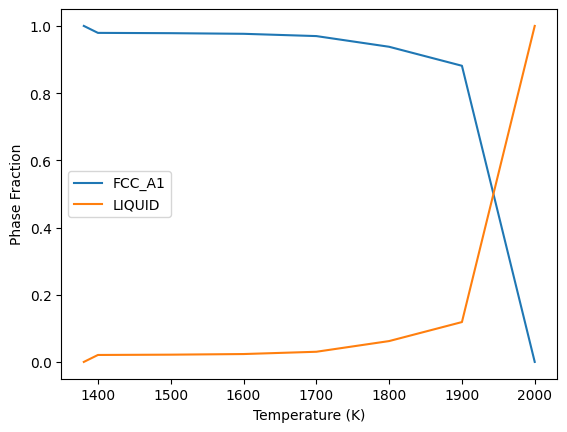

In [14]:
# plot the result
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    if amounts[-1] > 0:
        plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.legend(loc='best')
plt.show()

In [9]:
#EVERYTHING BELOW HERE IS GARBAGE, BUT IM scared to delete so ignore

comps2=unpack_components(dbf,['CR', 'FE','MO','CU','NI','VA'])
phases2 = filter_phases(dbf, unpack_components(dbf, comps), phases)
print(phases2)
models = instantiate_models(dbf, comps, phases2)
models2 = instantiate_models(dbf, comps2, filter_phases(dbf, comps2, phases2), model=CustomModel)

from pycalphad.codegen.callables import build_phase_records
phase_records = build_phase_records(dbf, comps, phases2, [v.N, v.P, v.T], models2)


eq=equilibrium(dbf,comps,phases2,{v.X('CU'): 0.2,v.X('CR'): 0.4,v.X('MO'): 0.01,v.X('FE'): 0.2, v.T: (500, 600, 100), v.N: 1, v.P:101325}, output='HM',verbose=True, model=models2, calc_opts={'grid_points': {'MU_PHASE': False}})